In [ ]:
graph()
state
edges
nodes
invoke
stategraph()

In [10]:
def function1(input1):
    return input1 + ' from first function'

In [11]:
def function2(input2):
    return input2 + ' Weekend Practice from second function'

In [12]:
def function3(input3):
    pass

In [13]:
function1('Preeti')

'Preeti from first function'

In [14]:
function2('Weekend Practice')

'Weekend Practice Weekend Practice from second function'

In [15]:
from langgraph.graph import Graph

In [16]:
workflow1=Graph()

In [17]:
workflow1.add_node('func1',function1)
workflow1.add_node('func2',function2)

In [18]:
workflow1.add_edge('func1','func2')

In [19]:
workflow1.set_entry_point('func1')
workflow1.set_finish_point('func2')

In [20]:
app=workflow1.compile()

In [21]:
app.get_graph()

Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='__end__', data=None, conditional=False)])

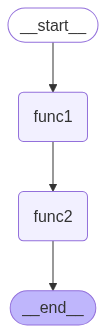

In [22]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
app.invoke("hi this is Preeti")

'hi this is Preeti from first function Weekend Practice from second function'

In [24]:
for output in app.stream("hi this is Preeti"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from func1
_______
hi this is Preeti from first function


here is output from func2
_______
hi this is Preeti from first function Weekend Practice from second function




Another workflow example

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")


In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [27]:
model.invoke('hi').content

'Hi there! How can I help you today?\n'

In [28]:
def llm(input):
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content


In [29]:
def token_counter(input):
    token=input.split()
    token_num=len(token)
    return f'total token number in generated ouput is {token_num}'

In [30]:
workflow2=Graph()

In [31]:
workflow2.add_node("My LLM",llm)

In [32]:
workflow2.add_node("LLM_output_token_counter",token_counter)

In [33]:
workflow2.add_edge("My LLM","LLM_output_token_counter")

In [34]:
workflow2.set_entry_point('My LLM')
workflow2.set_finish_point("LLM_output_token_counter")


In [35]:
app=workflow2.compile()

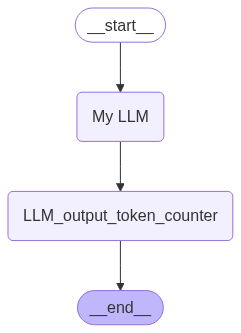

In [36]:
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
app.invoke('can you tell me capital of India?')

'total token number in generated ouput is 7'

In [38]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in generated ouput is 720'

In [39]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai, Maharashtra.  It's not a single entity but a sprawling network of more than 100 operating companies, under the umbrella of Tata Sons, a holding company.  Its history, structure, and operations are incredibly complex, making a truly comprehensive description lengthy.  However, I can provide a detailed overview across key aspects:

**I. History and Founding:**

The Tata Group's origins trace back to 1868 when Jamsetji Tata, a Parsi entrepreneur, founded the Tata & Sons trading company.  His initial ventures were in textile mills, but his vision extended far beyond.  He established the Tata Iron and Steel Company (now Tata Steel) in 1907, a landmark achievement laying the foundation for India's industrial growth.  Subsequent leaders, particularly J.R.D. Tata (Jamsetji's grandson), expanded the group into diverse sec